# augmentation_with_albumentation
albumentation : 증강을 위한 라이브러리



증강 라이브러리
- albumentation : 복잡한 기법 제공 / 증강 횟수 부여 X 등 디테일한 지원 기능 부족 - 별도의 커스텀 클래스로 디테일한 기능 구현 필요
- torchvision.transform : 간단한 기법만 제공 / 디테일한 지원 기능 + 다른 pytorch 기능들과 호환성이 좋음

In [ ]:
import cv2
import os

import numpy as np
from matplotlib import pyplot as plt

## Download sample data
basic 수업을 위해서, 샘플 이미지 3장을 gdown해보자.
- gdown : google drive에 저장되어있는 파일을 다운로드받기

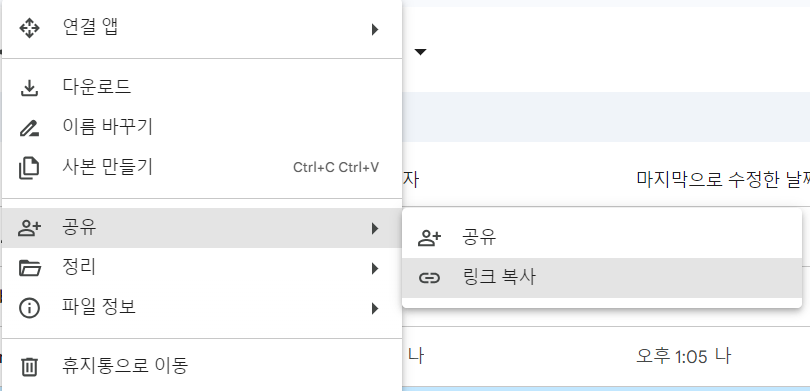

아래 링크에서
> [https://drive.google.com/file/d/1GoyVfXu_P-Gt4DQVOLFMzjTHrPb2zvNZ/view?usp=drive_link](https://drive.google.com/file/d/1GoyVfXu_P-Gt4DQVOLFMzjTHrPb2zvNZ/view?usp=drive_link)

  
  

/d/ 뒤에 있는 암호키를 발췌하여
> 1GoyVfXu_P-Gt4DQVOLFMzjTHrPb2zvNZ
  
  
gdown 명령에 넣어주면 된다.

> !gdown 1GoyVfXu_P-Gt4DQVOLFMzjTHrPb2zvNZ





In [ ]:
!pip install gdown==v4.6.3

  Attempting uninstall: gdown
    Found existing installation: gdown 5.2.0
    Uninstalling gdown-5.2.0:
      Successfully uninstalled gdown-5.2.0


In [ ]:
!gdown 1EVDm6wR2E2ukbW3u17VKaGWk5XkDedX6

Downloading...
From: https://drive.google.com/uc?id=1EVDm6wR2E2ukbW3u17VKaGWk5XkDedX6
To: /content/imgset_mini.zip
100% 83.2k/83.2k [00:00<00:00, 18.8MB/s]


레포지토리를 확인하면 imgset_mini.zip 파일에 생긴 것을 확인할 수 있다.  
zip파일 압축 해제를 해주자.
압축해제 명령어는 !unzip이다.

> !unzip 파일명





In [ ]:
!unzip imgset_mini.zip

Archive:  imgset_mini.zip
  inflating: airplane.jpg            
  inflating: car.jpg                 
  inflating: dog.jpg                 


airplane.jpg, car.jpg, dog.jpg 3개의 파일이 생긴 것을 확인할 수 있다.

## 이미지 파일 불러오기
레포지토리에 있는 이미지파일을 불러오려면,  
이미지파일의 경로가 필요하다.  
cv2를 이용하여, 이미지파일의 경로를 명시하면 이미지파일을 불러와서 변수에 저장할 수 있다.

In [ ]:
img_path = '/content/airplane.jpg'

array([[[243, 243, 213],
        [243, 243, 213],
        [245, 243, 213],
        ...,
        [249, 246, 225],
        [249, 246, 225],
        [249, 246, 225]],

       [[242, 242, 212],
        [242, 242, 212],
        [244, 242, 212],
        ...,
        [248, 245, 224],
        [248, 245, 224],
        [248, 245, 224]],

       [[243, 241, 210],
        [242, 240, 209],
        [242, 240, 210],
        ...,
        [249, 244, 223],
        [250, 245, 224],
        [250, 245, 224]],

       ...,

       [[ 86, 131, 152],
        [ 85, 130, 151],
        [ 83, 128, 149],
        ...,
        [ 84, 135, 161],
        [ 91, 142, 168],
        [ 90, 139, 165]],

       [[101, 147, 165],
        [100, 146, 164],
        [100, 148, 166],
        ...,
        [ 57, 105, 133],
        [ 71, 119, 147],
        [ 76, 123, 151]],

       [[108, 154, 171],
        [108, 154, 171],
        [116, 164, 182],
        ...,
        [ 82, 129, 157],
        [ 91, 138, 166],
        [ 90, 137, 165]]], dtype=uint8)
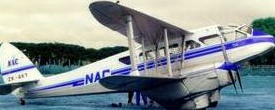

In [ ]:
# cv2.imread : 이미지파일 불러오기
img = cv2.imread(img_path)
img

In [ ]:
from matplotlib import pyplot as A

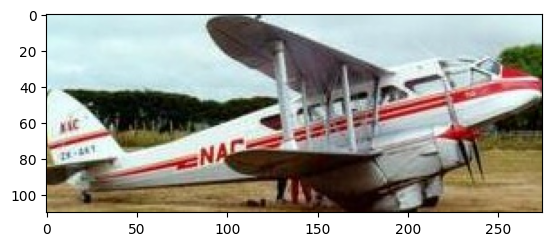

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import random

import cv2
from PIL import ImageOps,Image

In [ ]:
import albumentations as A

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.7'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
dir(A)

['AdditiveNoise',
 'AdvancedBlur',
 'Affine',
 'AtLeastOneBBoxRandomCrop',
 'AutoContrast',
 'BBoxSafeRandomCrop',
 'BaseCompose',
 'BasicTransform',
 'BboxParams',
 'Blur',
 'CLAHE',
 'CenterCrop',
 'CenterCrop3D',
 'ChannelDropout',
 'ChannelShuffle',
 'ChromaticAberration',
 'CoarseDropout',
 'CoarseDropout3D',
 'ColorJitter',
 'Compose',
 'ConstrainedCoarseDropout',
 'Crop',
 'CropAndPad',
 'CropNonEmptyMaskIfExists',
 'CubicSymmetry',
 'D4',
 'Defocus',
 'Downscale',
 'DualTransform',
 'ElasticTransform',
 'Emboss',
 'Equalize',
 'Erasing',
 'FDA',
 'FancyPCA',
 'FrequencyMasking',
 'FromFloat',
 'GaussNoise',
 'GaussianBlur',
 'GlassBlur',
 'GridDistortion',
 'GridDropout',
 'GridElasticDeform',
 'HEStain',
 'HistogramMatching',
 'HorizontalFlip',
 'HueSaturationValue',
 'ISONoise',
 'Illumination',
 'ImageCompression',
 'ImageOnlyTransform',
 'InvertImg',
 'KeypointParams',
 'Lambda',
 'LongestMaxSize',
 'MaskDropout',
 'MedianBlur',
 'Morphological',
 'Mosaic',
 'MotionBlur',
 

In [ ]:
transform = A.Compose([
    A.RandomCrop(width=110, height=110), #확률
    A.HorizontalFlip(p=0.5), # 발현 확률 반반
    A.RandomBrightnessContrast(p=0.2), #색밝기 조절
])

In [ ]:
transformed = transform(image=img)
transformed.keys() # dict 로 반환

dict_keys(['image'])

In [ ]:
transformed_img = transformed["image"]

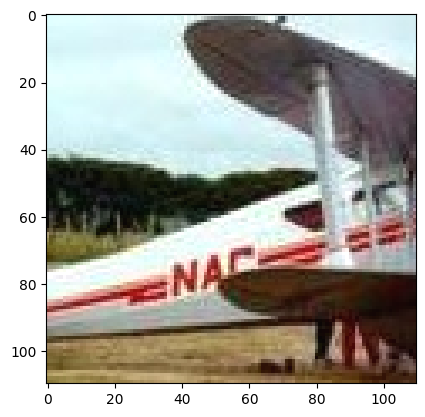

In [ ]:
plt.imshow(cv2.cvtColor(transformed_img, cv2.COLOR_BGR2RGB))

In [ ]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=1, contrast_limit=1, p=1.0)
])
transformed_img_1 = transform(image=img)['image']
transformed_img_2 = transform(image=img)['image']
transformed_img_3 = transform(image=img)['image']

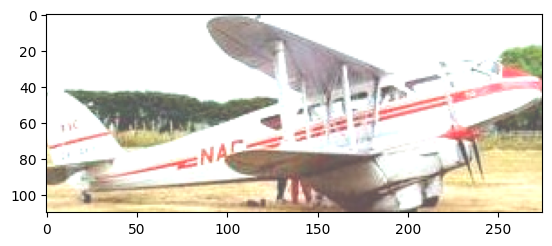

In [ ]:
plt.imshow(cv2.cvtColor(transformed_img_1, cv2.COLOR_BGR2RGB))

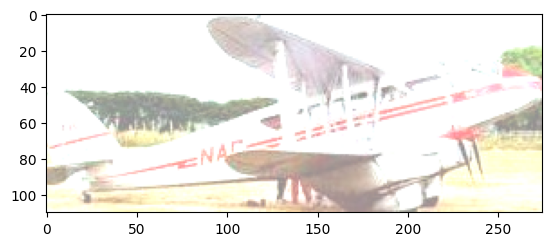

In [ ]:
plt.imshow(cv2.cvtColor(transformed_img_2, cv2.COLOR_BGR2RGB))

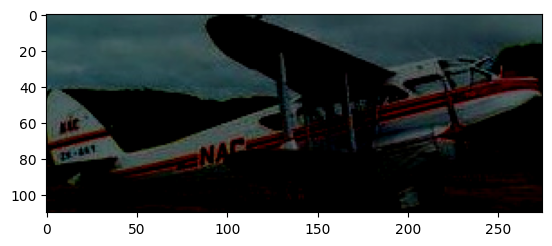

In [ ]:
plt.imshow(cv2.cvtColor(transformed_img_3, cv2.COLOR_BGR2RGB))

#### 문제
이미지 파일 3개 모두 입력받아, 모든 이미지에 일정한 증강 기법을 적용하여 리턴하는 함수를 만드시오.

In [ ]:
import glob

img_paths = glob.glob('/content/*.jpg')
img_paths

['/content/airplane.jpg', '/content/car.jpg', '/content/dog.jpg']

In [ ]:
import glob

img_paths = glob.glob('/content/*.jpg')

transform = A.Compose([
    A.RandomCrop(width=100, height=100),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

In [ ]:
os.mkdir('augmented')

In [ ]:
categories = ['airplane', 'car', 'dog']
for cat in categories:
    os.mkdir(f'augmented/{cat}')

FileExistsError: [Errno 17] File exists: 'augmented/airplane'

In [70]:
import glob
import cv2
import os

import numpy as np
from matplotlib import pyplot as plt

In [73]:
def augmentation():
    img_paths = glob.glob('/content/*.jpg')


    transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=1, contrast_limit=1, p=1.0)
    ])

    for img_path in img_paths:
        img = cv2.imread(img_path)
        if img is None:
            print(f"이미지 불러오기 실패: {img_path}")
            continue

        transformed_imgs = [transform(image=img)['image'] for _ in range(3)]

        plt.figure(figsize=(12,4))
        for i, t_img in enumerate(transformed_imgs):
            plt.subplot(1, 3, i + 1)
            plt.imshow(cv2.cvtColor(t_img, cv2.COLOR_BGR2RGB))
            plt.title(f'Augmented {i+1}')
            plt.axis('off')
        plt.suptitle(f"original: {img_path.split('/')[-1]}")
        plt.show()

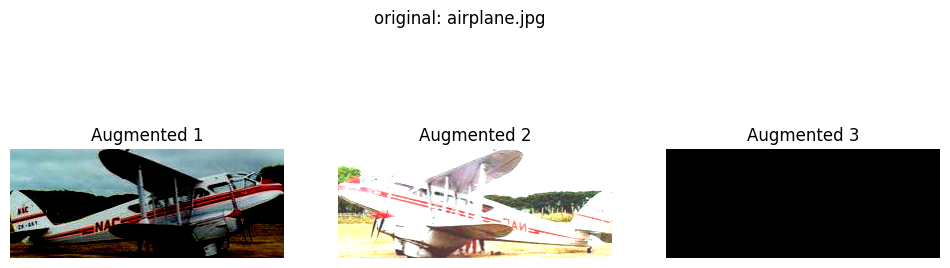

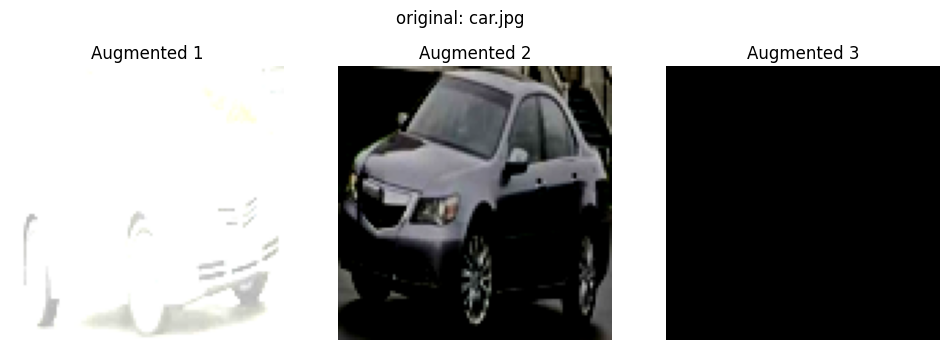

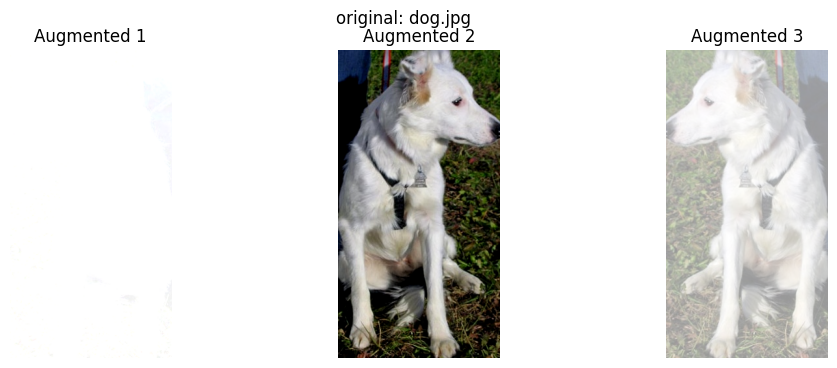

In [65]:
augmentation()

In [74]:
def augmentation_and_save():
    img_paths = glob.glob('/content/*.jpg')
    save_dir = '/content/augmented'
    os.makedirs(save_dir, exist_ok=True)

    transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=1, contrast_limit=1, p=1.0)
    ])

    for img_path in img_paths:
        img = cv2.imread(img_path)
        if img is None:
            print(f"이미지 불러오기 실패: {img_path}")
            continue

        base_name = os.path.splitext(os.path.basename(img_path))[0]

        for i in range(3):  # 증강 이미지 3개 생성
            transformed_img = transform(image=img)['image']
            save_path = os.path.join(save_dir, f"{base_name}_aug{i}.jpg")
            cv2.imwrite(save_path, transformed_img)
            print(f"저장 완료: {save_path}")

In [67]:
augmentation_and_save()

저장 완료: /content/augmented/airplane_aug0.jpg
저장 완료: /content/augmented/airplane_aug1.jpg
저장 완료: /content/augmented/airplane_aug2.jpg
저장 완료: /content/augmented/car_aug0.jpg
저장 완료: /content/augmented/car_aug1.jpg
저장 완료: /content/augmented/car_aug2.jpg
저장 완료: /content/augmented/dog_aug0.jpg
저장 완료: /content/augmented/dog_aug1.jpg
저장 완료: /content/augmented/dog_aug2.jpg


In [ ]:
def image_augment(img_paths, transform, num_aug=1):
    '''
        img_paths : 이미지 경로
        transform : 증강 모듈
        num_aug : 1장당 증강 횟수
    '''
    images = []
    transform_imgs = []

    for img_path in img_paths:
        filename = os.path.basename(img_path)[:-4] # 확장자 제거
        image = cv2.imread(img_path)

        for i in range(num_aug):
            transform_img = transform(image=image)['image']

            transform_imgs.append(transform_img)
            cv2.imwrite(f'/content/augmented/{filename}/{filename}_{i:03}.jpg',
                        transform_img)
    return transform_imgs

In [ ]:
num_aug = 500
image_augment(img_paths, transform, num_aug=num_aug)

[array([[[  7,  31,  21],
         [  6,  31,  21],
         [  9,  39,  28],
         ...,
         [129, 136, 145],
         [135, 141, 148],
         [136, 142, 147]],
 
        [[  7,  31,  19],
         [  2,  26,  14],
         [ 10,  38,  25],
         ...,
         [126, 132, 143],
         [132, 138, 145],
         [135, 141, 146]],
 
        [[ 30,  56,  42],
         [ 27,  53,  39],
         [ 15,  46,  31],
         ...,
         [124, 133, 143],
         [127, 134, 143],
         [130, 138, 145]],
 
        ...,
 
        [[ 55,  69,  81],
         [ 28,  40,  44],
         [  6,  20,  19],
         ...,
         [105, 109, 110],
         [102, 106, 107],
         [ 99, 104, 105]],
 
        [[ 44,  58,  70],
         [ 32,  43,  51],
         [ 16,  28,  34],
         ...,
         [107, 111, 112],
         [105, 109, 110],
         [102, 107, 108]],
 
        [[ 57,  71,  83],
         [ 70,  82,  92],
         [ 59,  72,  80],
         ...,
         [106, 110, 111],
  